# Current Analysis

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import time
import datetime
%matplotlib inline

## Magnitude by month for 2015

In [ ]:
lows = ['2015 Feb 1 00:00','2015 Mar 1 00:00','2015 Apr 1 00:00','2015 May 1 00:00','2015 Jun 1 00:00','2015 July 1 00:00','2015 Aug 1 00:00','2015 Sept 1 00:00','2015 Oct 1 00:00','2015 Nov 1 00:00','2015 Dec 1 00:00']
highs = ['2015 Mar 1 00:00','2015 Apr 1 00:00','2015 May 1 00:00','2015 Jun 1 00:00','2015 July 1 00:00','2015 Aug 1 00:00','2015 Sept 1 00:00','2015 Oct 1 00:00','2015 Nov 1 00:00','2015 Dec 1 00:00','2016 Jan 1 00:00']
months = ['feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for i in range(11):
    timestart = time.time()
    u_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06").isel(depth = 0)
    u_raw20 = u_raw20.uVelocity.sel(time=slice(lows[i], highs[i])).values
    v_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceVVelocity20mV18-06").isel(depth = 0)
    v_raw20 = v_raw20.vVelocity.sel(time=slice(lows[i], highs[i])).values
    mag = np.sqrt(u_raw20**2 + v_raw20**2)
    u_raw20 = 0
    v_raw20 = 0
    filenm = "mag_{}.pickle".format(months[i])
    pickle_data = open(filenm, "wb")
    pickle.dump(mag, pickle_data)
    pickle_data.close()
    mag = 0
    print(i)
    print(time.time() - timestart)

## Magnitude by month for 2016

In [ ]:
lows = ['2016 Jan 1 00:00', '2016 Feb 1 00:00','2016 Mar 1 00:00','2016 Apr 1 00:00','2016 May 1 00:00','2016 Jun 1 00:00','2016 July 1 00:00','2016 Aug 1 00:00','2016 Sept 1 00:00','2016 Oct 1 00:00','2016 Nov 1 00:00','2016 Dec 1 00:00']
highs = ['2016 Feb 1 00:00','2016 Mar 1 00:00','2016 Apr 1 00:00','2016 May 1 00:00','2016 Jun 1 00:00','2016 July 1 00:00','2016 Aug 1 00:00','2016 Sept 1 00:00','2016 Oct 1 00:00','2016 Nov 1 00:00','2016 Dec 1 00:00','2017 Jan 1 00:00']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for i in range(12):
    timestart = time.time()
    u_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06").isel(depth = 0)
    u_raw20 = u_raw20.uVelocity.sel(time=slice(lows[i], highs[i])).values
    v_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceVVelocity20mV18-06").isel(depth = 0)
    v_raw20 = v_raw20.vVelocity.sel(time=slice(lows[i], highs[i])).values
    mag = np.sqrt(u_raw20**2 + v_raw20**2)
    u_raw20 = 0
    v_raw20 = 0
    filenm = "2016_20m/mag_{}.pickle".format(months[i])
    pickle_data = open(filenm, "wb")
    pickle.dump(mag, pickle_data)
    pickle_data.close()
    mag = 0
    print(i)
    print(time.time() - timestart)

## Magnitude by month for 2017

In [ ]:
lows = ['2017 Jan 1 00:00', '2017 Feb 1 00:00','2017 Mar 1 00:00','2017 Apr 1 00:00','2017 May 1 00:00','2017 Jun 1 00:00','2017 July 1 00:00','2017 Aug 1 00:00','2017 Sept 1 00:00','2017 Oct 1 00:00','2017 Nov 1 00:00','2017 Dec 1 00:00']
highs = ['2017 Feb 1 00:00','2017 Mar 1 00:00','2017 Apr 1 00:00','2017 May 1 00:00','2017 Jun 1 00:00','2017 July 1 00:00','2017 Aug 1 00:00','2017 Sept 1 00:00','2017 Oct 1 00:00','2017 Nov 1 00:00','2017 Dec 1 00:00','2018 Jan 1 00:00']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for i in range(12):
    timestart = time.time()
    u_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06").isel(depth = 0)
    u_raw20 = u_raw20.uVelocity.sel(time=slice(lows[i], highs[i])).values
    v_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceVVelocity20mV18-06").isel(depth = 0)
    v_raw20 = v_raw20.vVelocity.sel(time=slice(lows[i], highs[i])).values
    mag = np.sqrt(u_raw20**2 + v_raw20**2)
    u_raw20 = 0
    v_raw20 = 0
    filenm = "2017_20m/mag_{}.pickle".format(months[i])
    pickle_data = open(filenm, "wb")
    pickle.dump(mag, pickle_data)
    pickle_data.close()
    mag = 0
    print(i)
    print(time.time() - timestart)

## Magnitude by month for 2018

In [ ]:
lows = ['2018 Jan 1 00:00', '2018 Feb 1 00:00','2018 Mar 1 00:00','2018 Apr 1 00:00','2018 May 1 00:00','2018 Jun 1 00:00','2018 July 1 00:00','2018 Aug 1 00:00','2018 Sept 1 00:00','2018 Oct 1 00:00','2018 Nov 1 00:00','2018 Dec 1 00:00']
highs = ['2018 Feb 1 00:00','2018 Mar 1 00:00','2018 Apr 1 00:00','2018 May 1 00:00','2018 Jun 1 00:00','2018 July 1 00:00','2018 Aug 1 00:00','2018 Sept 1 00:00','2018 Oct 1 00:00','2018 Nov 1 00:00','2018 Dec 1 00:00','2019 Jan 1 00:00']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for i in range(12):
    timestart = time.time()
    u_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06").isel(depth = 0)
    u_raw20 = u_raw20.uVelocity.sel(time=slice(lows[i], highs[i])).values
    v_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceVVelocity20mV18-06").isel(depth = 0)
    v_raw20 = v_raw20.vVelocity.sel(time=slice(lows[i], highs[i])).values
    mag = np.sqrt(u_raw20**2 + v_raw20**2)
    u_raw20 = 0
    v_raw20 = 0
    filenm = "2018_20m/mag_{}.pickle".format(months[i])
    pickle_data = open(filenm, "wb")
    pickle.dump(mag, pickle_data)
    pickle_data.close()
    mag = 0
    print(i)
    print(time.time() - timestart)

## Calculate Mean of Data

In [ ]:
folders = ['2015_20m','2016_20m','2017_20m','2018_20m']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
sum_array = np.zeros([540,355])
time_steps = 0
for folder in folders:
    for i in range(12):
        fname = "{}/mag_{}.pickle".format(folder, months[i])
        unpickle = open(fname, "rb")
        data = pickle.load(unpickle)
        time_steps = time_steps + data.shape[0]
        sum_array = sum_array + sum(data)
        data = 0
    
mean_data = sum_array/time_steps

## Calculate magnitudes of hourly data by year

In [ ]:
years = [2015, 2016, 2017, 2018]

for year in years:

    timestart = time.time()

    u_rawhr = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DuGridFields1hV18-06").isel(depth = 0)

    u_rawhr = u_rawhr.sel(time=u_rawhr.time.dt.year.isin([year])).uVelocity.sel(gridX = slice(10, 364), gridY = slice(200, 739)).values

    v_rawhr = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DvGridFields1hV18-06").isel(depth = 0)

    v_rawhr = v_rawhr.sel(time=v_rawhr.time.dt.year.isin([year])).vVelocity.sel(gridX = slice(10, 364), gridY = slice(200, 739)).values

    mag = np.sqrt(u_rawhr **2 + v_rawhr**2)

    filename = "mag{}.pickle".format(str(year))

    pickle_data = open(filename, "wb")

    pickle.dump(mag, pickle_data, protocol = 4)

    pickle_data.close()

    u_rawhr = 0

    v_rawhr = 0

    mag = 0

    print(year)

    print(time.time() - timestart)

## Calculate Mean of Hourly Data

In [ ]:
sum_array = np.zeros([540,355])
time_steps = 0
for year in [2015,2016,2017,2018]:
    filename = "hourly/mag{}.pickle".format(str(year))
    unpickle = open(filename, 'rb')
    data = pickle.load(unpickle)
    sum_array = sum_array + sum(data)
    time_steps = time_steps + data.shape[0]
    data = 0

mean_data = sum_array / time_steps

# ! -- Analysis Begins Here





...

# Unpickle and Retrieve Mean Data

In [2]:
filepath = open('/home/abhudia/Desktop/Current analysis/mean_hr.pickle', 'rb')
mean_hr = pickle.load(filepath)

In [3]:
check =  mean_hr[~np.isnan(mean_hr)]
check = check[np.logical_not(check == 0)]

In [4]:
check.shape

(65783,)

In [5]:
filepath = open('/home/abhudia/Desktop/Current analysis/mean_20.pickle', 'rb')
mean_20 = pickle.load(filepath)

In [6]:
check_1 = mean_20[~np.isnan(mean_20)]
check_1 = check_1[np.logical_not(check_1 == 0)]

In [7]:
check_1.shape

(65783,)

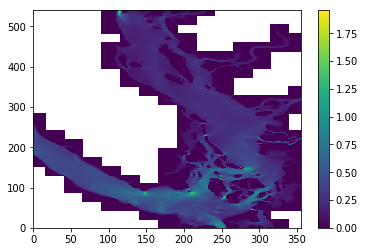

In [8]:
plt.pcolormesh(mean_hr)
plt.colorbar()

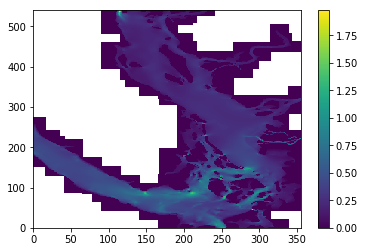

In [9]:
plt.pcolormesh(mean_20)
plt.colorbar()

# Compare the difference between the means

In [10]:
diff_mean = np.abs(mean_hr - mean_20)

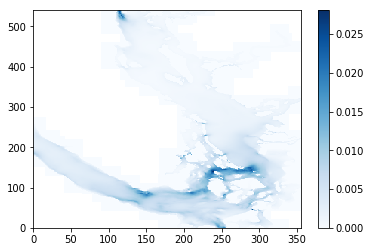

In [11]:
plt.pcolormesh(diff_mean, cmap = 'Blues')
plt.colorbar()

In [12]:
print('The maximum value is')
print(np.nanmax(diff_mean))
print('and it occurs at gridpoint')
print(np.where(diff_mean == np.nanmax(diff_mean)))

The maximum value is
0.028048265314852827
and it occurs at gridpoint
(array([141]), array([239]))


In [86]:
flatten  = diff_mean.ravel()
flatten = flatten[~np.isnan(flatten)]

(array([7.9217e+04, 1.5587e+04, 8.9180e+03, 3.0490e+03, 1.2960e+03,
        7.8000e+02, 4.1500e+02, 1.6600e+02, 3.2000e+01, 1.0000e+01]),
 array([0.        , 0.00280483, 0.00560965, 0.00841448, 0.01121931,
        0.01402413, 0.01682896, 0.01963379, 0.02243861, 0.02524344,
        0.02804827]),
 <a list of 10 Patch objects>)

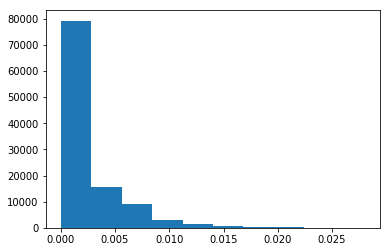

In [87]:
plt.hist(flatten)

In [ ]:

%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (13.5,7))
ax = fig.add_subplot(111, projection='3d')
X = np.arange(355)
Y = np.arange(540)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, diff_mean, linewidth=0, antialiased=False)

plt.show()

# Standard Deviation of Hourly Data

In [66]:
sum_array = np.zeros([540,355])
time_steps = 0
for year in [2015,2016,2017,2018]:
    filename = "/home/abhudia/Desktop/Current analysis/hourly/mag{}.pickle".format(str(year))
    unpickle = open(filename, 'rb')
    data = pickle.load(unpickle)
    sum_array = sum_array + sum(data - mean_hr)**2 
    time_steps = time_steps + data.shape[0]
    data = 0

std_hr = np.sqrt(sum_array / (time_steps - 1))

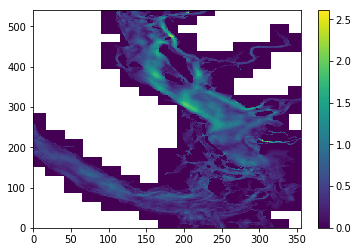

In [69]:
plt.pcolormesh(std_hr)
plt.colorbar()

In [68]:
pickle_hr = open("std_hr.pickle", "wb")
pickle.dump(std_hr, pickle_hr)
pickle_hr.close()

# Standard Deviation of 20 minute data

In [65]:
sum_array = np.zeros([540,355])
time_steps = 0
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for year in [2015,2016,2017,2018]:
    for month in months:
        filename = "/home/abhudia/Desktop/Current analysis/20min/{}_20m/mag_{}.pickle".format(str(year), month)
        unpickle = open(filename, 'rb')
        data = pickle.load(unpickle)
        sum_array = sum_array + sum(data- mean_20)**2 
        time_steps = time_steps + data.shape[0]
        data = 0

std_20 = np.sqrt(sum_array / (time_steps - 1))

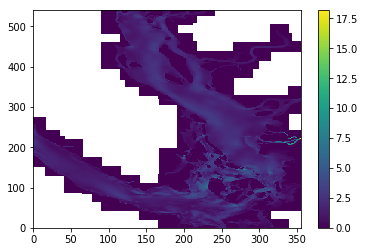

In [70]:
plt.pcolormesh(std_20)
plt.colorbar()

In [67]:
pickle_20 = open("std_20.pickle", "wb")
pickle.dump(std_20, pickle_20)
pickle_20.close()

# Comparing the difference in standard deviation

In [71]:
diff_std = np.abs(std_20-std_hr)

In [72]:
print('The maximum value is')
print(np.nanmax(diff_std))
print('and it occurs at gridpoint')
print(np.where(diff_std == np.nanmax(diff_std)))

The maximum value is
17.358040294133485
and it occurs at gridpoint
(array([223]), array([354]))


In [84]:
flatten  = diff_std.flatten()
flatten = flatten[~np.isnan(flatten)]

(array([9.8137e+04, 1.0085e+04, 1.0790e+03, 9.8000e+01, 3.9000e+01,
        1.1000e+01, 1.7000e+01, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 0.        ,  1.73580403,  3.47160806,  5.20741209,  6.94321612,
         8.67902015, 10.41482418, 12.15062821, 13.88643224, 15.62223626,
        17.35804029]),
 <a list of 10 Patch objects>)

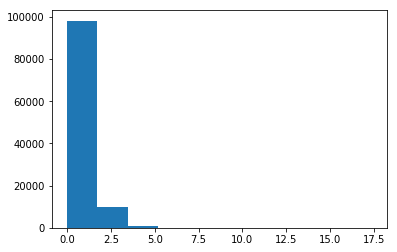

In [85]:
plt.hist(flatten)

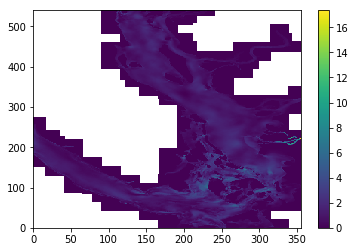

In [73]:
plt.pcolormesh(diff_std)
plt.colorbar()

In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (13.5,7))
ax = fig.add_subplot(111, projection='3d')
X = np.arange(355)
Y = np.arange(540)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, diff_std, linewidth=0, antialiased=False)

plt.show()

## Pickling Data Points

In [7]:
Y = np.arange(540); X = np.arange(355)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for year in [2016,2017,2018]:
    locals()["sog" + str(year)] = np.array([])
    for month in months:
        filename= ("/home/abhudia/Desktop/Current analysis/20min/{}_20m/mag_{}.pickle").format(str(year), month)
        unpickle = open(filename, "rb")
        locals()["ssh" + str(year)] = pickle.load(unpickle)
        times = np.arange(locals()["ssh" + str(year)].shape[0])
        locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
        locals()["sog" + str(year)] = np.append(locals()["sog" + str(year)], locals()["ssh" + str(year)].isel(X = 242, Y = 274).values)
        locals()["ssh" + str(year)] = False
    fname = "current_sog{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["sog" + str(year)], picklefile)
    picklefile.close()
    locals()["sog" + str(year)] = False

In [8]:
Y = np.arange(540); X = np.arange(355)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for year in [2015,2016,2017,2018]:
    locals()["salmon" + str(year)] = np.array([])
    for month in months:
        filename= ("/home/abhudia/Desktop/Current analysis/20min/{}_20m/mag_{}.pickle").format(str(year), month)
        unpickle = open(filename, "rb")
        locals()["ssh" + str(year)] = pickle.load(unpickle)
        times = np.arange(locals()["ssh" + str(year)].shape[0])
        locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
        locals()["salmon" + str(year)] = np.append(locals()["salmon" + str(year)], locals()["ssh" + str(year)].isel(X = 258, Y = 56).values)
        locals()["ssh" + str(year)] = False
    fname = "current_salmon{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["salmon" + str(year)], picklefile)
    picklefile.close()
    locals()["salmon" + str(year)] = False

In [10]:
Y = np.arange(540); X = np.arange(355)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
for year in [2015,2016,2017,2018]:
    locals()["turn" + str(year)] = np.array([])
    for month in months:
        filename= ("/home/abhudia/Desktop/Current analysis/20min/{}_20m/mag_{}.pickle").format(str(year), month)
        unpickle = open(filename, "rb")
        locals()["ssh" + str(year)] = pickle.load(unpickle)
        times = np.arange(locals()["ssh" + str(year)].shape[0])
        locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
        locals()["turn" + str(year)] = np.append(locals()["turn" + str(year)], locals()["ssh" + str(year)].isel(X = 240, Y = 143).values)
        locals()["ssh" + str(year)] = False
    fname = "current_turn{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["turn" + str(year)], picklefile)
    picklefile.close()
    locals()["turn" + str(year)] = False

## Create Variables

In [11]:
data = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06")

In [20]:
times_current = data.time.sel(time = data.time.dt.year.isin([2015,2016,2017,2018])).values.astype('datetime64[D]').astype(datetime.datetime)

In [15]:
for year in [2015, 2016, 2017, 2018]:
    fname = "current_sog{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["current_sog" + str(year)] = pickle.load(file)
    locals()["t_sog" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_sog" + str(year)].append(time)

In [16]:
for year in [2015, 2016, 2017, 2018]:
    fname = "current_salmon{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["current_salmon" + str(year)] = pickle.load(file)
    locals()["t_salmon" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_salmon" + str(year)].append(time)

In [17]:
for year in [2015, 2016, 2017, 2018]:
    fname = "current_turn{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["current_turn" + str(year)] = pickle.load(file)
    locals()["t_turn" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_turn" + str(year)].append(time)

## Create Plots

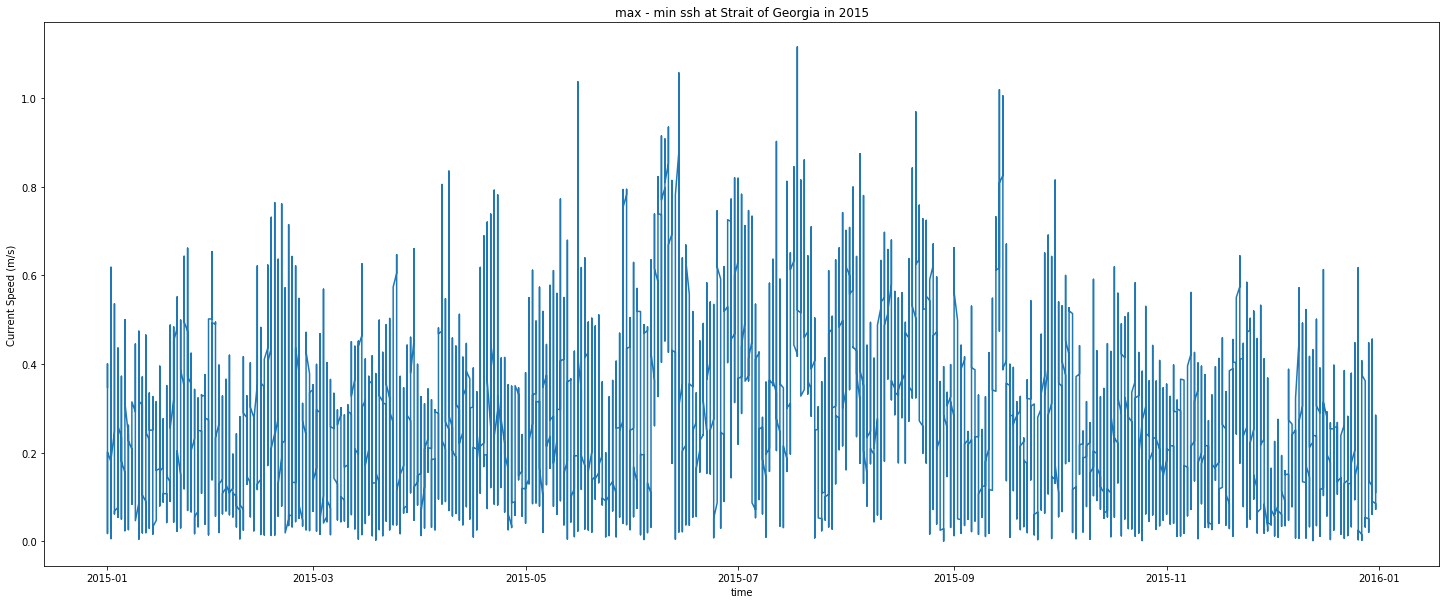

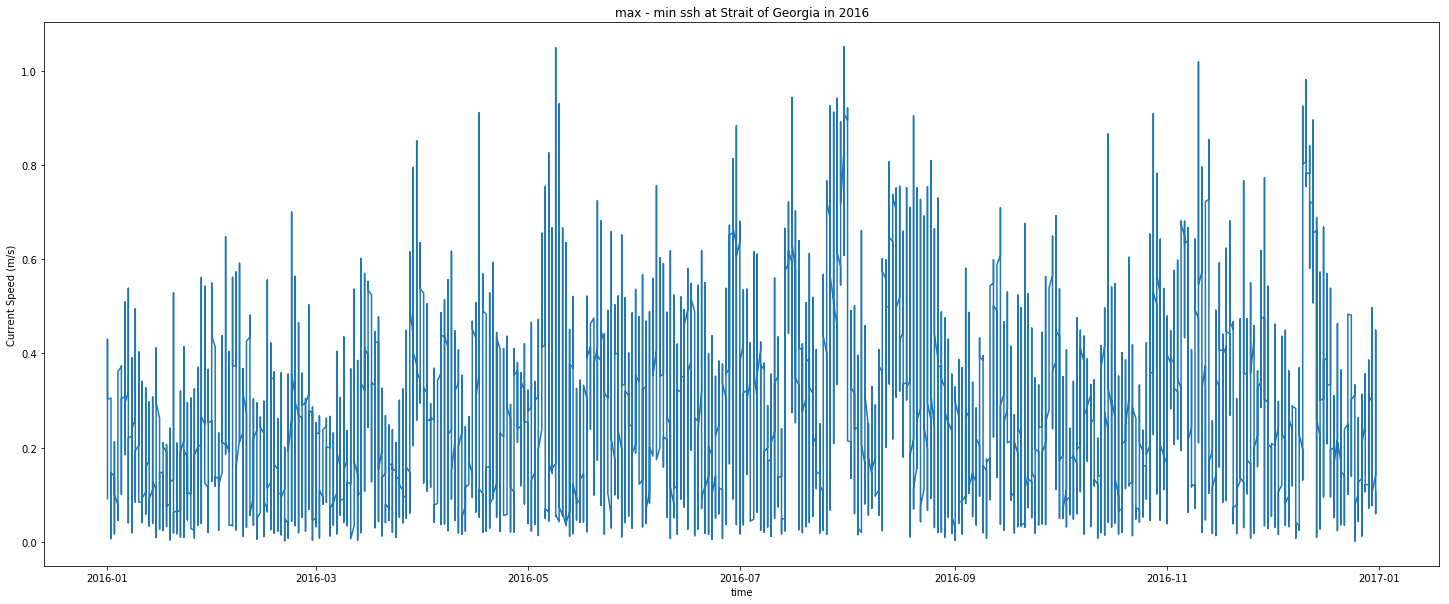

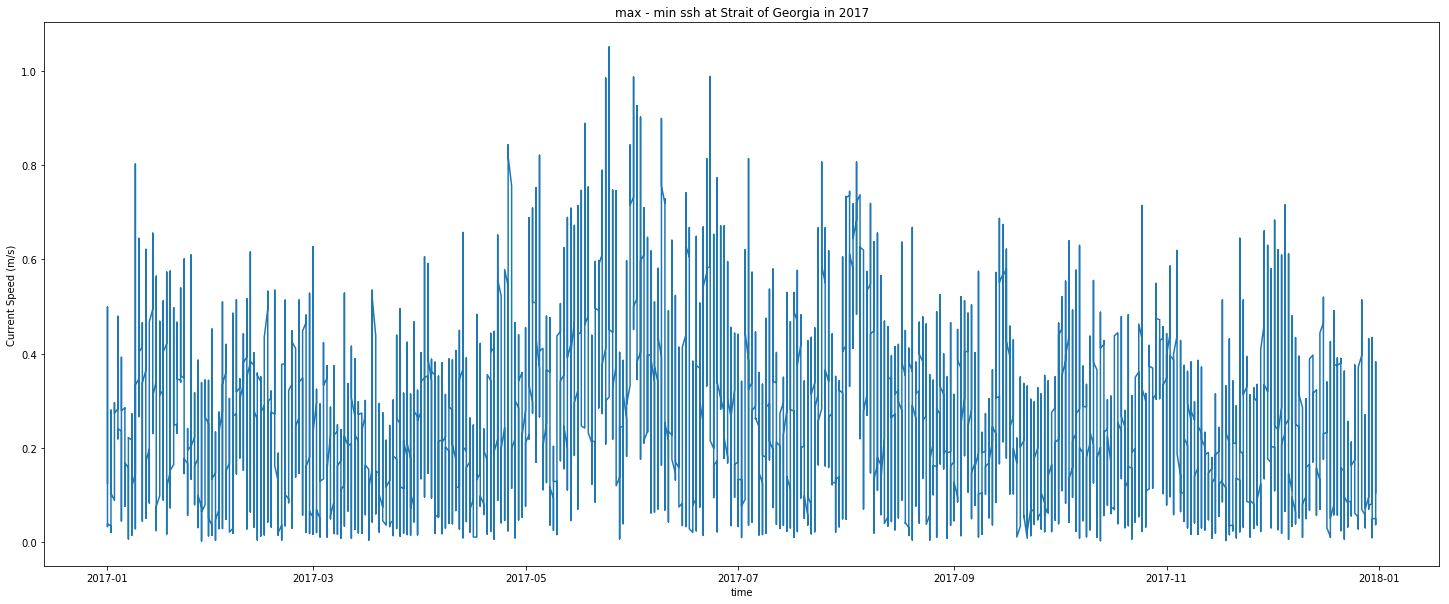

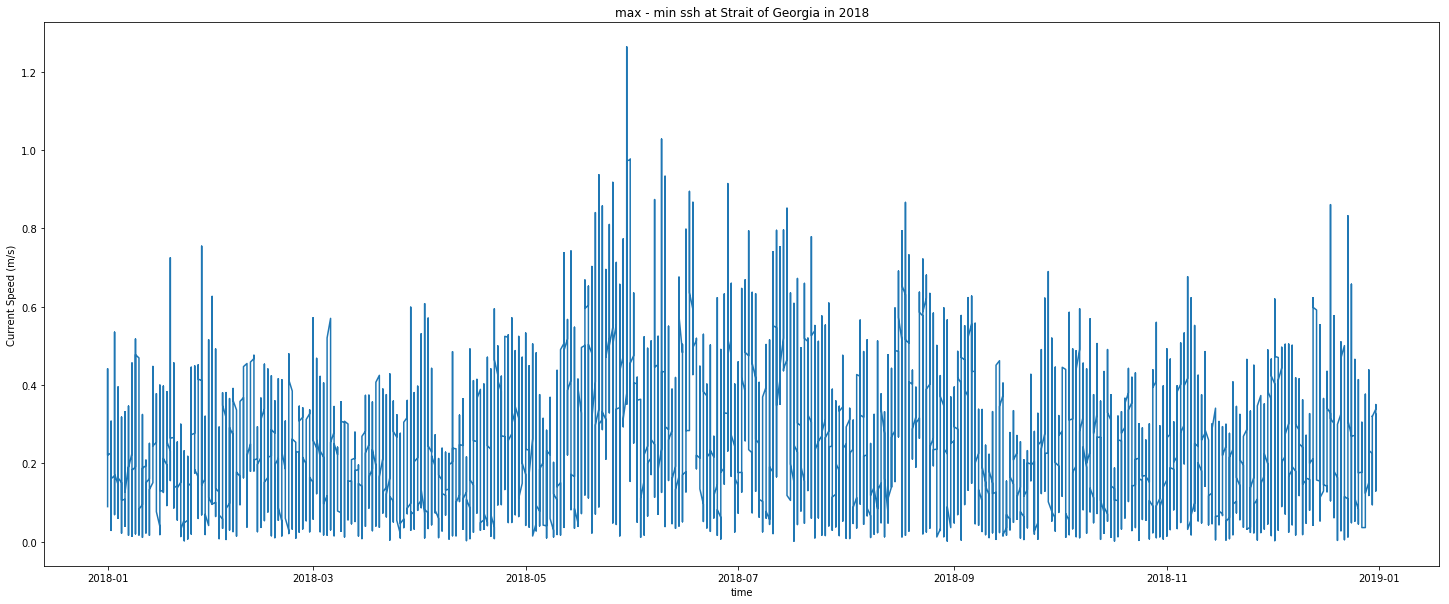

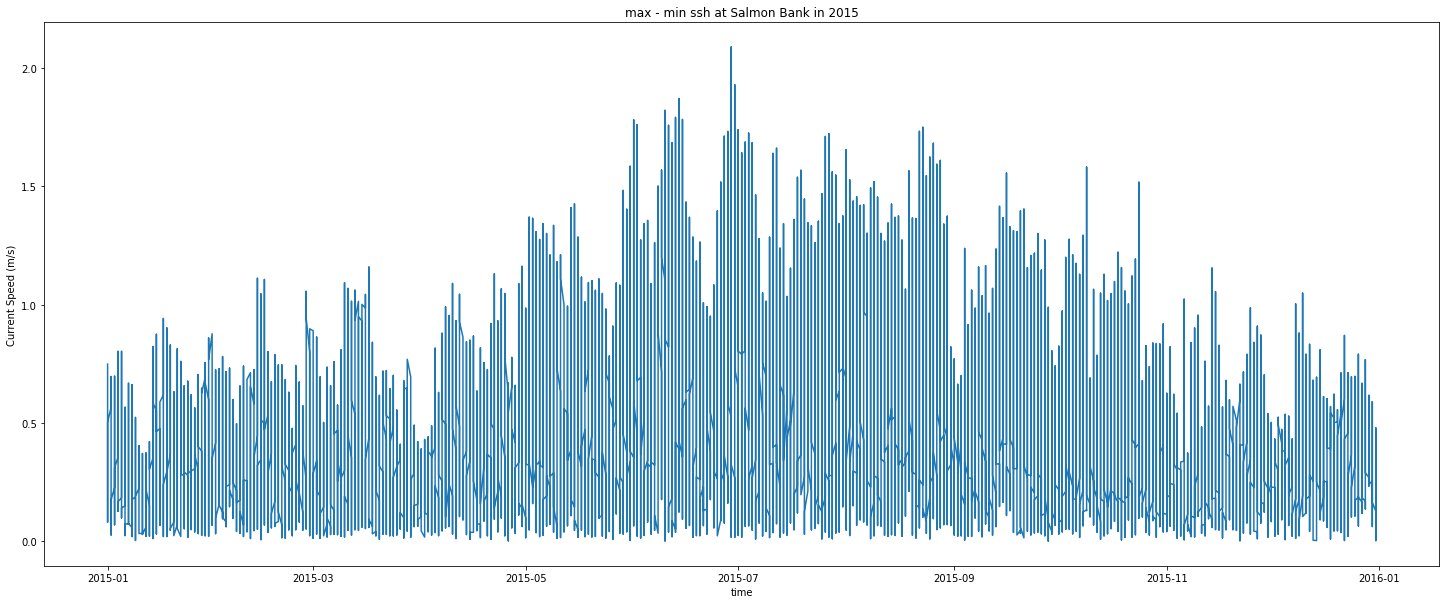

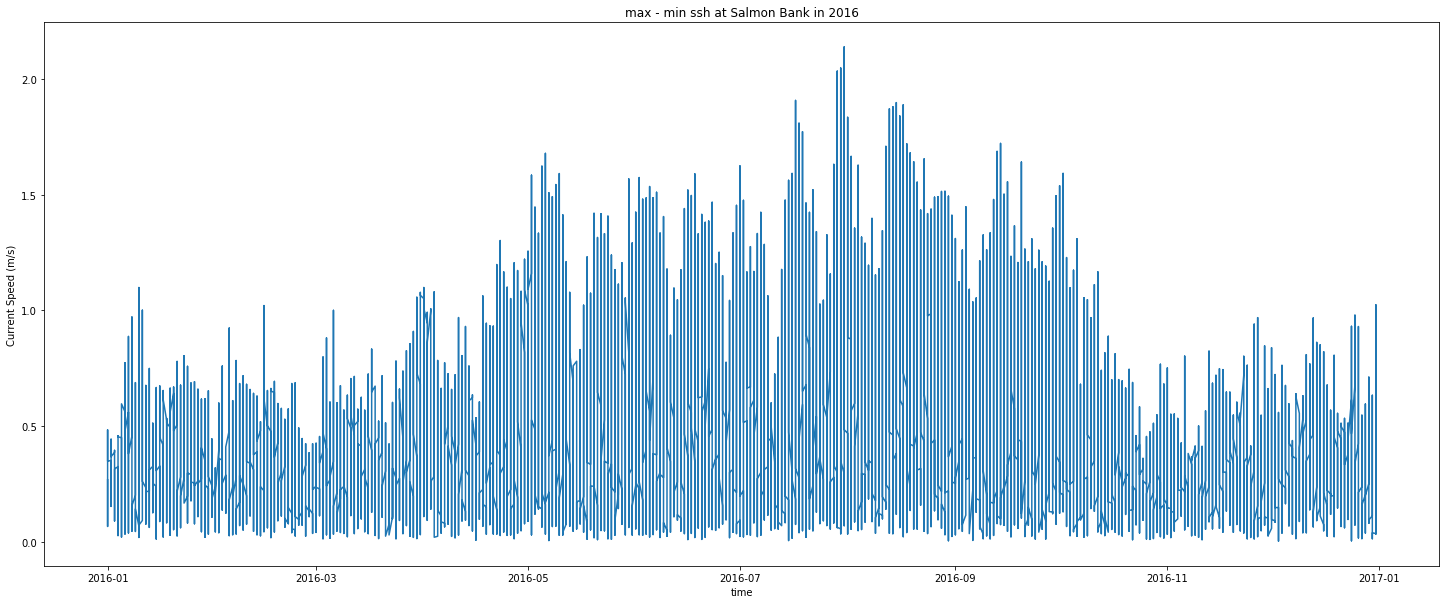

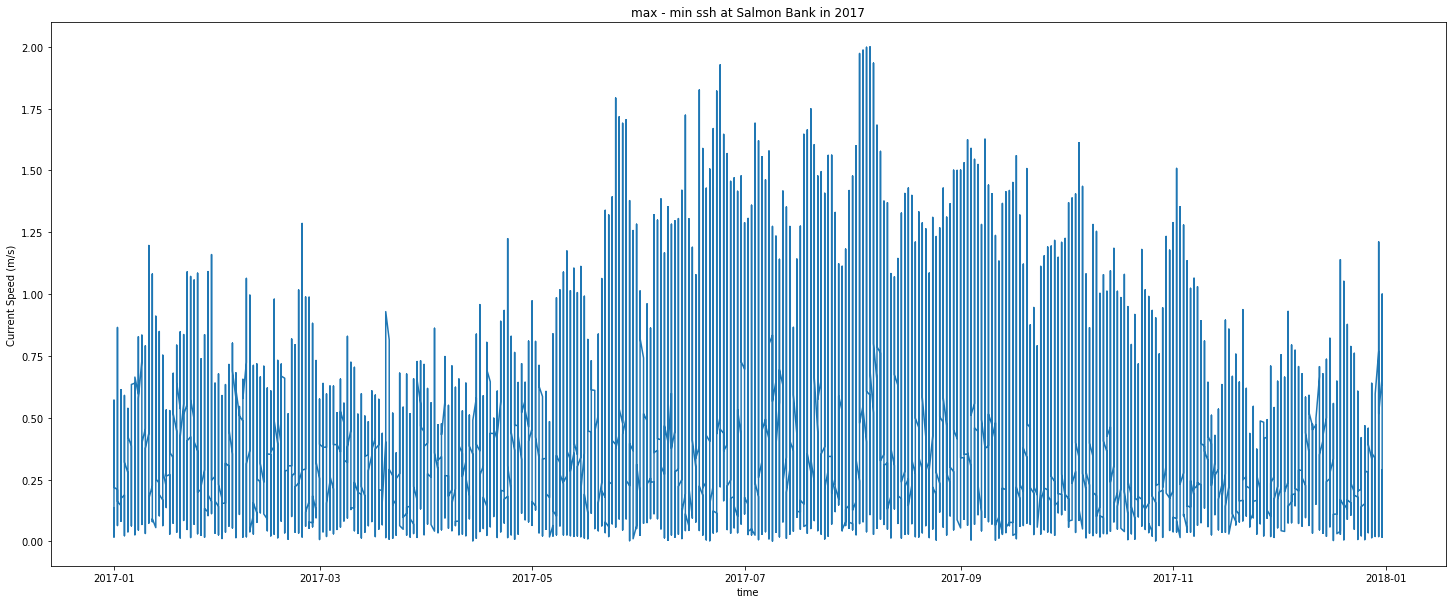

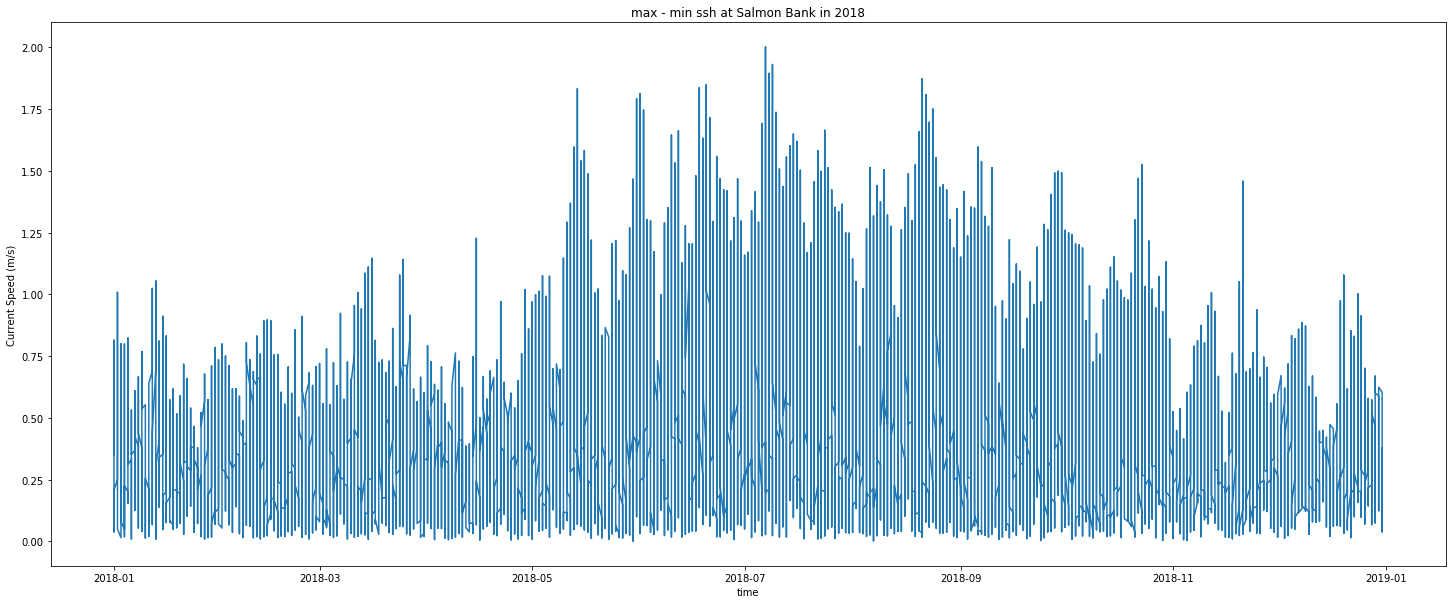

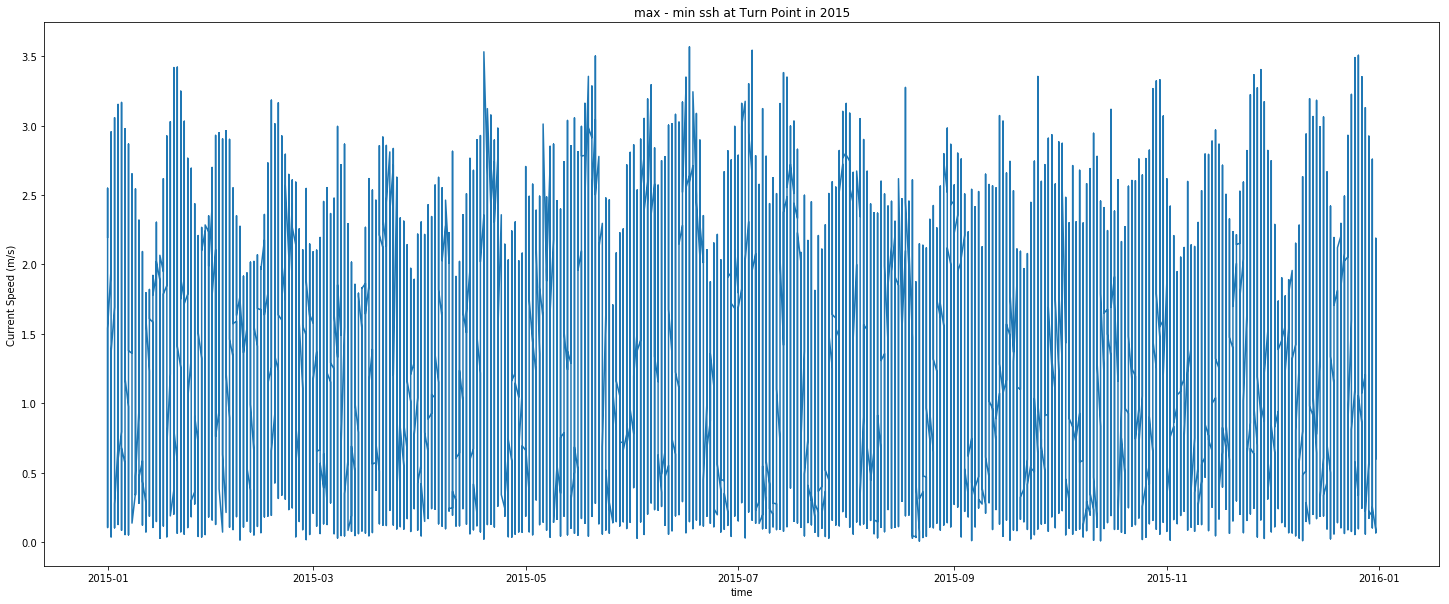

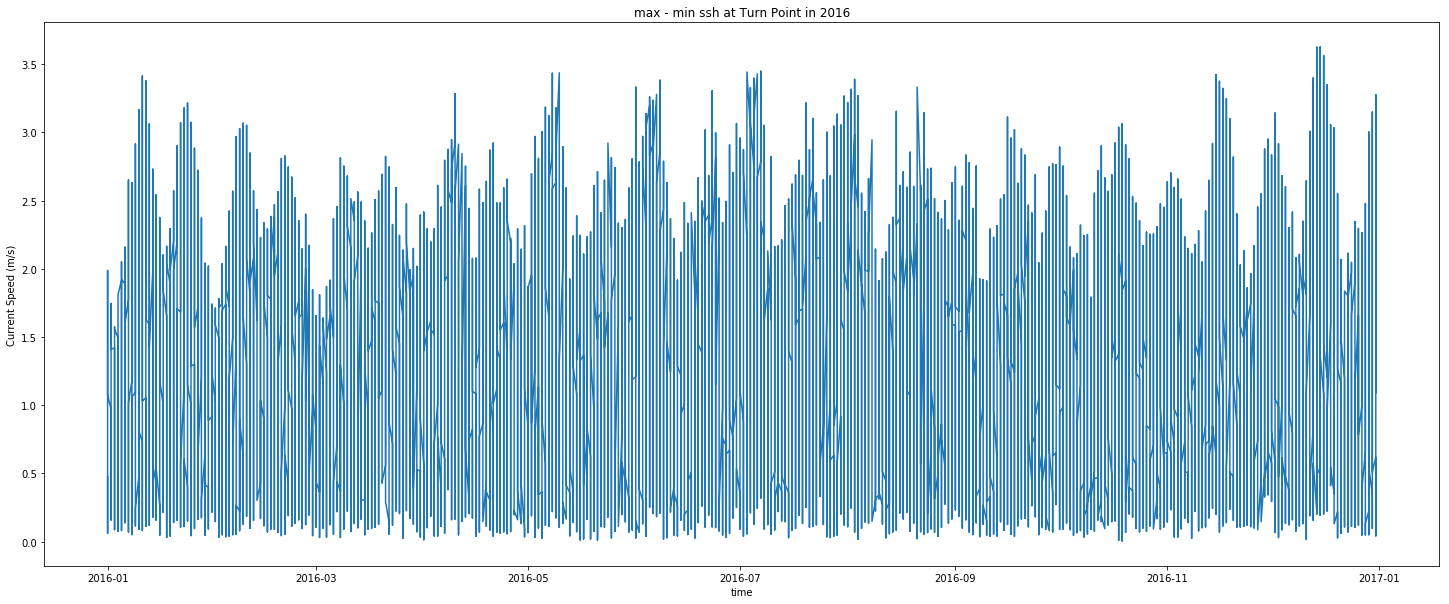

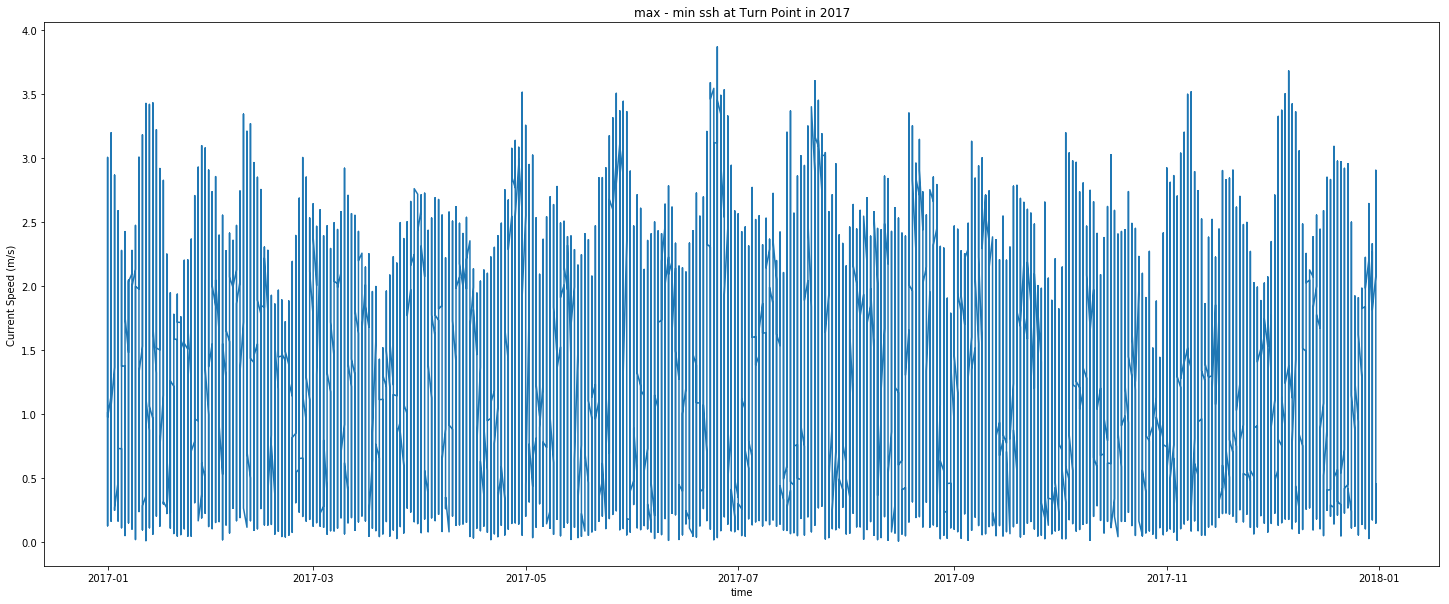

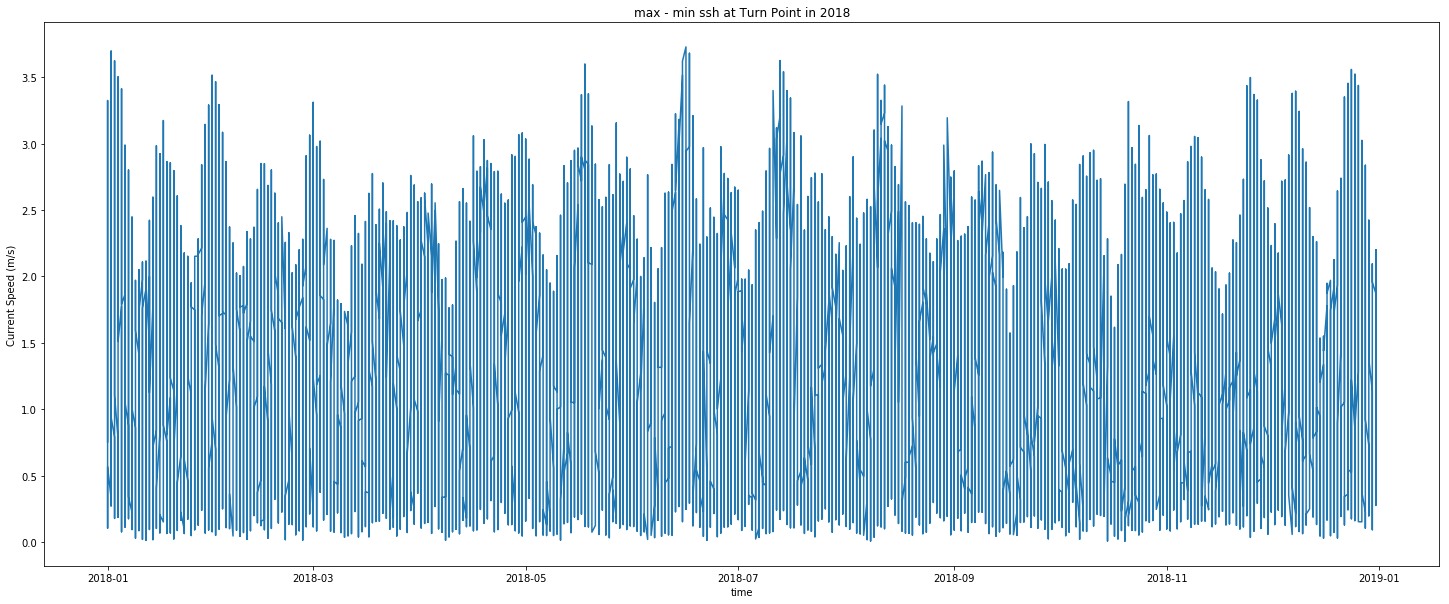

In [23]:
locs = ['sog', 'salmon', 'turn']
locations = ['Strait of Georgia', 'Salmon Bank', 'Turn Point']
years = [2015, 2016, 2017, 2018]

for index in range(3):
    for year in years:
        current = locals()['current_{}{}'.format(locs[index], str(year))]
        times = []
        for time in times_current: 
            if time.year == year:
                times.append(time)
        fig = plt.figure(figsize=(25,10))
        plt.plot(times, current)
        plt.xlabel('time')
        plt.ylabel('Current Speed (m/s)')
        title = 'max - min ssh at {} in {}'.format(locations[index], year)
        plt.title(title)